# Housekeeping

### 1.1 Load Libraries

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#machine learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans 
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import operator
from functools import reduce
import random

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

### 1.2 Load data

In [3]:
#import data
old_train = pd.read_csv("C:/Users/Meyke/WiDS/data/train.csv")
old_test = pd.read_csv("C:/Users/Meyke/WiDS/data/test.csv")

In [4]:
#version 18/1/22 - imputed dataset
df = pd.read_csv("C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv")

del df['Unnamed: 0']

In [6]:
df['id'].head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [7]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(old_train["id"])]
df_test = df[df["id"].isin(old_test["id"])]

In [8]:
# Encode Categorical Columns 
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

<ipython-input-8-5592173b5e3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = le.fit_transform(df_train[col])
<ipython-input-8-5592173b5e3a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = le.fit_transform(df_test[col])


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Columns: 111 entries, year_factor to energy_star_above_75
dtypes: float64(48), int32(4), int64(59)
memory usage: 63.6 MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 75757 to 85461
Columns: 111 entries, year_factor to energy_star_above_75
dtypes: float64(48), int32(4), int64(59)
memory usage: 8.1 MB


In [11]:
df = df_train.append(df_test)

In [12]:
#del df['index']

In [13]:
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,...,energy_star_rating,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id,number_january,number_february,number_march,number_april,number_may,number_june,number_july,number_august,number_september,number_october,number_november,number_december,total_number,number_winter,number_spring,number_summer,number_autumn,eui_improved,eui_diff,hdd_extreme,hdd_extreme_2,avg_total_number_building,year_built_bin,yearB_E_int,calculated_eui,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75
0,1,0,0,13,61242.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,11.0,1,0,0,0,1,0,0,0,3,1942,1,3,3,2,29.0,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,2,3,231.720532,-0.068208,10,10,0.856815,3,245.522877,241.135162,0,0
1,1,0,0,55,274000.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,45.0,0,0,0,0,1,0,0,0,1,1955,4,1,1,2,40.6,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,3,2,26.057054,-0.016720,1,1,-0.209475,2,27.609132,39.559542,0,0
2,1,0,0,48,280025.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,97.0,0,0,0,0,1,0,0,0,13,1951,4,1,1,2,97.8,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22068.147067,3,2,22.171559,-0.102134,1,1,-0.218145,2,23.481589,100.965937,1,1
3,1,0,0,6,55325.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,46.0,0,0,0,0,1,0,0,0,2,1980,1,2,2,1,49.1,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22050.354236,4,2,40.891278,-0.155260,2,2,-0.104341,2,43.272466,69.441531,0,0
4,1,0,0,56,66000.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194

In [14]:
features_for_cluster =  ['id','january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'max_wind_speed',
 'days_with_fog','peak_NE',
 'peak_SW',
 'peak_NW',
 'max_NE',
 'max_SW',
 'max_NW','number_january',
 'number_february',
 'number_march',
 'number_april',
 'number_may',
 'number_june',
 'number_july',
 'number_august',
 'number_september',
 'number_october',
 'number_november',
 'number_december',
 'total_number',
 'number_winter',
 'number_spring',
 'number_summer',
 'number_autumn']

In [15]:
df = df[features_for_cluster]

In [16]:
df = df.set_index('id')

In [17]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [18]:
df =normalize(df)

In [19]:
#df.isna().sum().sort_values(ascending=False)

In [20]:
df = df.reset_index()

In [21]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(old_train["id"])]
df_test = df[df["id"].isin(old_test["id"])]

In [22]:
df_train = df_train.set_index('id')
df_test = df_test.set_index('id')

Text(0.5, 0, 'B')

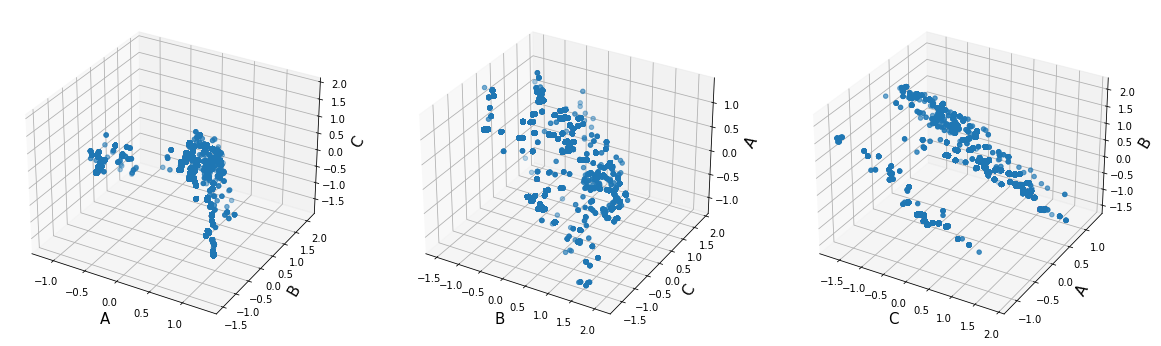

In [23]:
plt.rcParams["figure.figsize"] = (7,7)

#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
PC=pca.fit_transform(df_train)
PC_test=pca.transform(df_test)

PC = np.concatenate([PC, PC_test])

pdf=pd.DataFrame(data=PC,columns=['A','B','C'])
#sns.scatterplot(data=pdf, x="A", y="B", hue="C")

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(131, projection='3d')
sc = ax.scatter(pdf['A'],pdf['B'],pdf['C'],
                cmap='cool')
ax.set_xlabel("A", fontsize=15)
ax.set_ylabel("B", fontsize=15, rotation=60)
ax.set_zlabel("C", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(132, projection='3d')
sc = ax.scatter(pdf['B'],pdf['C'],pdf['A'],
                cmap='cool')
ax.set_xlabel("B", fontsize=15)
ax.set_ylabel("C", fontsize=15, rotation=60)
ax.set_zlabel("A", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(133, projection='3d')
sc = ax.scatter(pdf['C'],pdf['A'],pdf['B'],
                cmap='cool')
ax.set_xlabel("C", fontsize=15)
ax.set_ylabel("A", fontsize=15, rotation=60)
ax.set_zlabel("B", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

In [24]:
pdf['id'] = df['id'].to_list()
pdf

,A,B,C,id
0,-1.066435,1.142829,-0.525235,0
1,-0.422026,1.343933,-0.398742,1
2,-0.422026,1.343933,-0.398742,2
3,-0.422026,1.343933,-0.398742,3
4,-1.066435,1.142829,-0.525235,4
...,...,...,...,...
85457,0.345016,0.711320,0.350891,85457
85458,0.345016,0.711320,0.350891,85458
85459,0.345016,0.711320,0.350891,85459
85460,0.345016,0.711320,0.350891,85460


In [25]:
pdf = pdf.set_index('id')

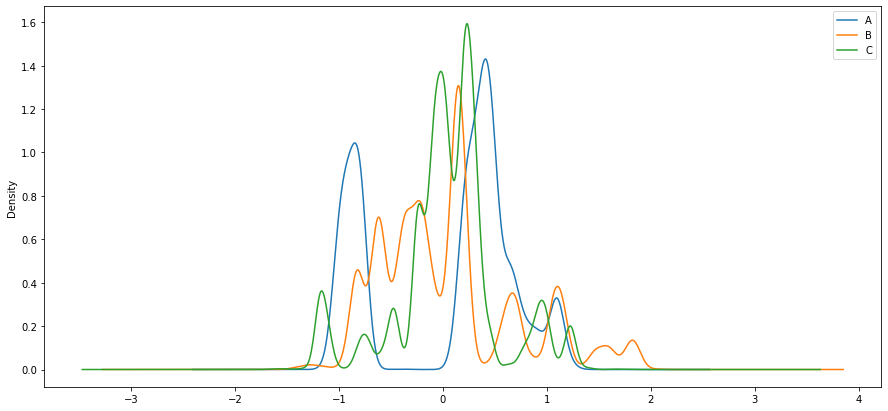

In [26]:
plt.rcParams["figure.figsize"] = (15,7)
pdf.plot.density()
plt.show()

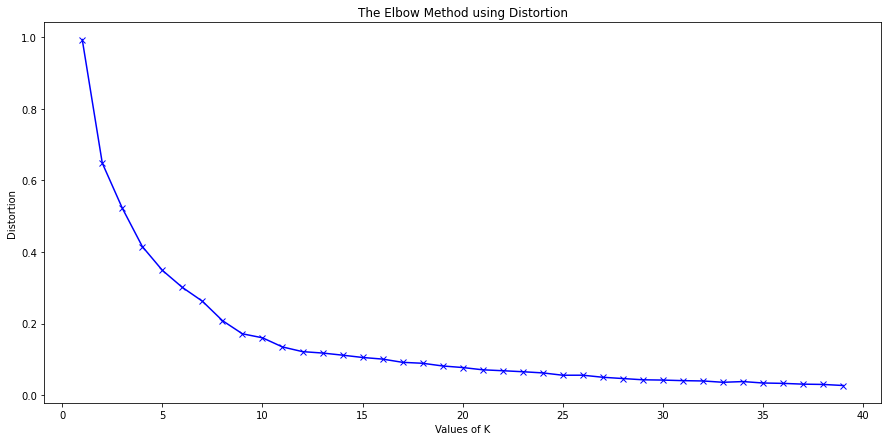

In [27]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 40)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(pdf)
    kmeanModel.fit(pdf)
 
    distortions.append(sum(np.min(cdist(pdf, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / pdf.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(pdf, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / pdf.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [28]:
pdf = pdf.reset_index()

#split into (new) train and test set based on id
pdf_train = pdf[pdf["id"].isin(old_train["id"])]
pdf_test = pdf[pdf["id"].isin(old_test["id"])]

In [29]:
pdf_train = pdf_train.set_index('id')

In [30]:
pdf_test = pdf_test.set_index('id')

In [31]:
pdf = pdf.set_index('id')

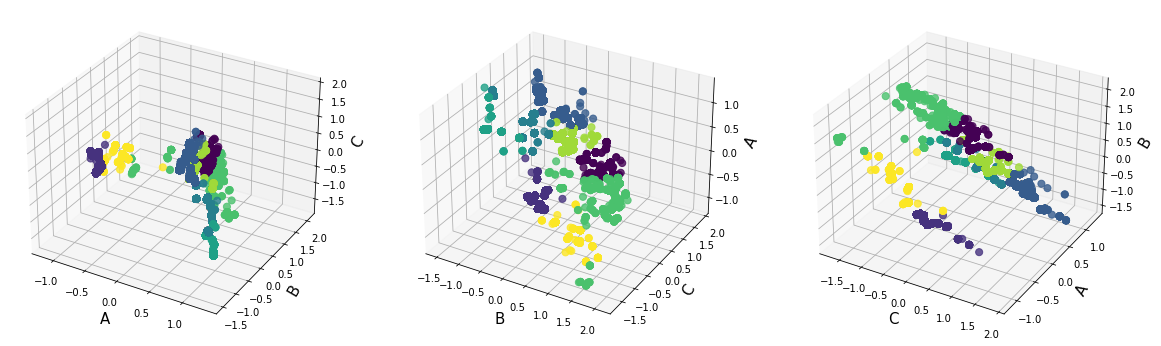

In [32]:
#Kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 8).fit(pdf_train)
y_kmeans=km.predict(pdf)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(131, projection='3d')
sc = ax.scatter(pdf['A'],pdf['B'],pdf['C'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("A", fontsize=15)
ax.set_ylabel("B", fontsize=15, rotation=60)
ax.set_zlabel("C", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(132, projection='3d')
sc = ax.scatter(pdf['B'],pdf['C'],pdf['A'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("B", fontsize=15)
ax.set_ylabel("C", fontsize=15, rotation=60)
ax.set_zlabel("A", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(133, projection='3d')
sc = ax.scatter(pdf['C'],pdf['A'],pdf['B'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("C", fontsize=15)
ax.set_ylabel("A", fontsize=15, rotation=60)
ax.set_zlabel("B", fontsize=15, rotation=60);
#plt.title('CoDisp above 99.5th percentile')

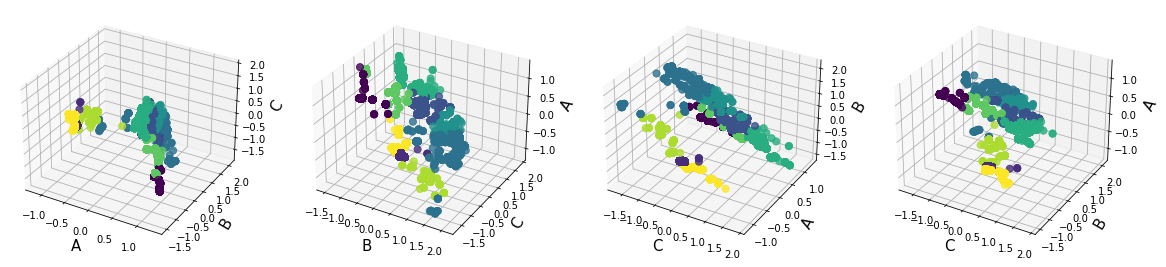

In [33]:
#Kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 9).fit(pdf_train)
y_kmeans=km.predict(pdf)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(141, projection='3d')
sc = ax.scatter(pdf['A'],pdf['B'],pdf['C'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("A", fontsize=15)
ax.set_ylabel("B", fontsize=15, rotation=60)
ax.set_zlabel("C", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(142, projection='3d')
sc = ax.scatter(pdf['B'],pdf['C'],pdf['A'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("B", fontsize=15)
ax.set_ylabel("C", fontsize=15, rotation=60)
ax.set_zlabel("A", fontsize=15, rotation=60)
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(143, projection='3d')
sc = ax.scatter(pdf['C'],pdf['A'],pdf['B'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("C", fontsize=15)
ax.set_ylabel("A", fontsize=15, rotation=60)
ax.set_zlabel("B", fontsize=15, rotation=60);
#plt.title('CoDisp above 99.5th percentile')

ax = fig.add_subplot(144, projection='3d')
sc = ax.scatter(pdf['C'],pdf['B'],pdf['A'],
                c=y_kmeans, s=50, alpha=0.8)
ax.set_xlabel("C", fontsize=15)
ax.set_ylabel("B", fontsize=15, rotation=60)
ax.set_zlabel("A", fontsize=15, rotation=60);
#plt.title('CoDisp above 99.5th percentile')

In [34]:
pdf['cluster_9'] = y_kmeans
pdf

,A,B,C,cluster_9
id,,,,
0,-1.066435,1.142829,-0.525235,7
1,-0.422026,1.343933,-0.398742,3
2,-0.422026,1.343933,-0.398742,3
3,-0.422026,1.343933,-0.398742,3
4,-1.066435,1.142829,-0.525235,7
...,...,...,...,...
85457,0.345016,0.711320,0.350891,4
85458,0.345016,0.711320,0.350891,4
85459,0.345016,0.711320,0.350891,4


In [35]:
pdf = pdf.reset_index()

In [36]:
pdf

,id,A,B,C,cluster_9
0,0,-1.066435,1.142829,-0.525235,7
1,1,-0.422026,1.343933,-0.398742,3
2,2,-0.422026,1.343933,-0.398742,3
3,3,-0.422026,1.343933,-0.398742,3
4,4,-1.066435,1.142829,-0.525235,7
...,...,...,...,...,...
85457,85457,0.345016,0.711320,0.350891,4
85458,85458,0.345016,0.711320,0.350891,4
85459,85459,0.345016,0.711320,0.350891,4
85460,85460,0.345016,0.711320,0.350891,4


In [39]:
#
df = pd.read_csv("C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv")
del df['Unnamed: 0']

In [40]:
df

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,...,energy_star_rating,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id,number_january,number_february,number_march,number_april,number_may,number_june,number_july,number_august,number_september,number_october,number_november,number_december,total_number,number_winter,number_spring,number_summer,number_autumn,eui_improved,eui_diff,hdd_extreme,hdd_extreme_2,avg_total_number_building,year_built_bin,yearB_E_int,calculated_eui,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.50000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,11.0,1,0,0,0,1,0,0,0,food_sales_service,1942,1,3,3,2,29.0,1566.55555,1418.66785,1668.93785,1667.7240,1768.23175,1821.46950,1948.21145,1931.46055,1943.82435,1954.89605,1616.51970,1530.4737,20836.97230,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,2,3,231.720532,-0.068208,10,10,0.856815,3,245.522877,241.135162,0,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.50000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,45.0,0,0,0,0,1,0,0,0,distribution_shipping,1955,4,1,1,2,40.6,1566.55555,1418.66785,1668.93785,1667.7240,1768.23175,1821.46950,1948.21145,1931.46055,1943.82435,1954.89605,1616.51970,1530.4737,20836.97230,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,3,2,26.057054,-0.016720,1,1,-0.209475,2,27.609132,39.559542,0,0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.50000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,97.0,0,0,0,0,1,0,0,0,retail,1951,4,1,1,2,97.8,1566.55555,1418.66785,1668.93785,1667.7240,1768.23175,1821.46950,1948.21145,1931.46055,1943.82435,1954.89605,1616.51970,1530.4737,20836.97230,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22068.147067,3,2,22.171559,-0.102134,1,1,-0.218145,2,23.481589,100.965937,1,1
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.50000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,...,46.0,0,0,0,0,1,0,0,0,eduation,1980,1,2,2,1,49.1,1566.55555,1418.66785,1668.93785,1667.7240,1768.23175,1821.46950,1948.21145,1931.46055,1943.82435,1954.89605,1616.51970,1530.4737,20836.97230,4654.1612

In [41]:
df['weather_cluster'] = df.apply(lambda row: pdf[pdf['id'] == row.id]['cluster_9'].values[0] if row.id in pdf['id'].to_list() else np.nan, axis=1)

In [42]:
df['weather_cluster'].notna().sum()

85462

In [43]:
df.groupby(['weather_cluster','state_factor'])['year_factor'].count()

weather_cluster  state_factor
0                State_10            7
                 State_6          5555
                 State_8            48
1                State_1             1
                 State_11            3
                 State_2            95
                 State_6          9631
2                State_1            23
                 State_10            4
                 State_11          340
                 State_2          2949
                 State_6         15052
                 State_8           986
3                State_1          4848
4                State_1          1111
                 State_11         8690
                 State_2          1515
5                State_1             7
                 State_11           28
                 State_4          5855
                 State_6             3
                 State_8          2451
6                State_1             1
                 State_10            4
                 State_11         

<AxesSubplot:xlabel='weather_cluster', ylabel='heating_degree_days'>

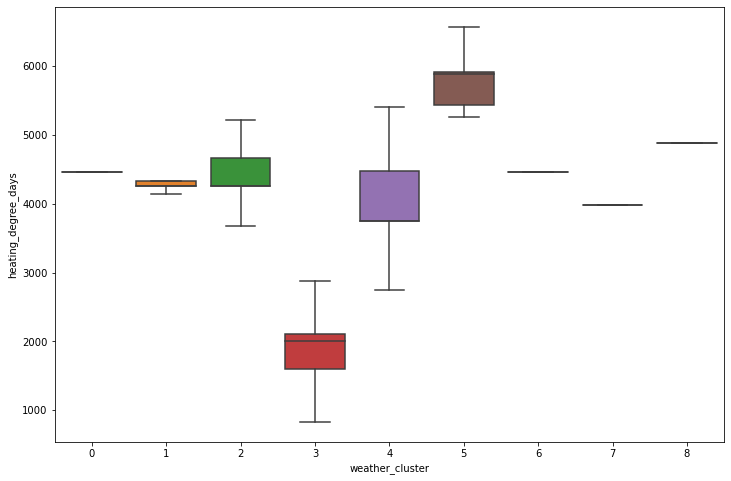

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="heating_degree_days", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='cooling_degree_days'>

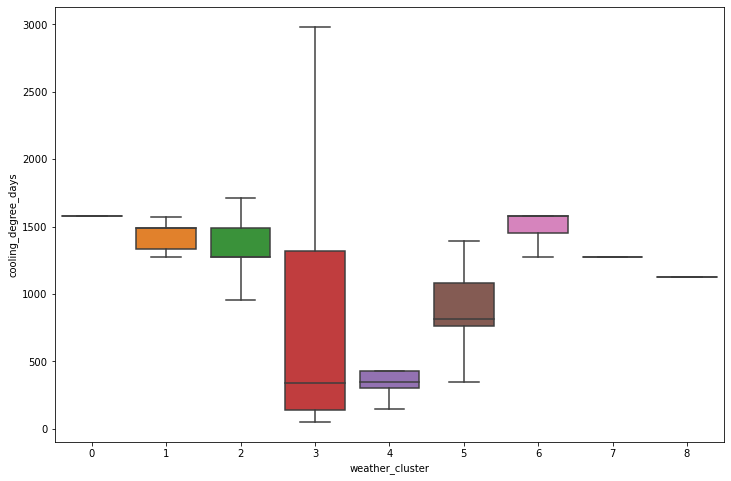

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="cooling_degree_days", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='total_number'>

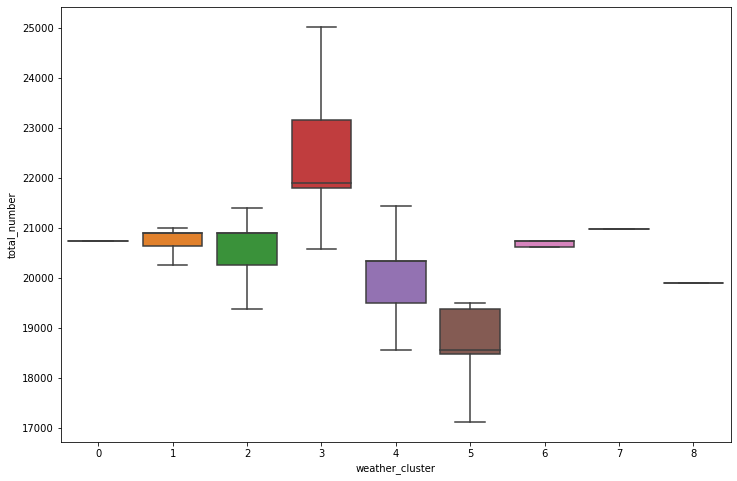

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="total_number", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='number_summer'>

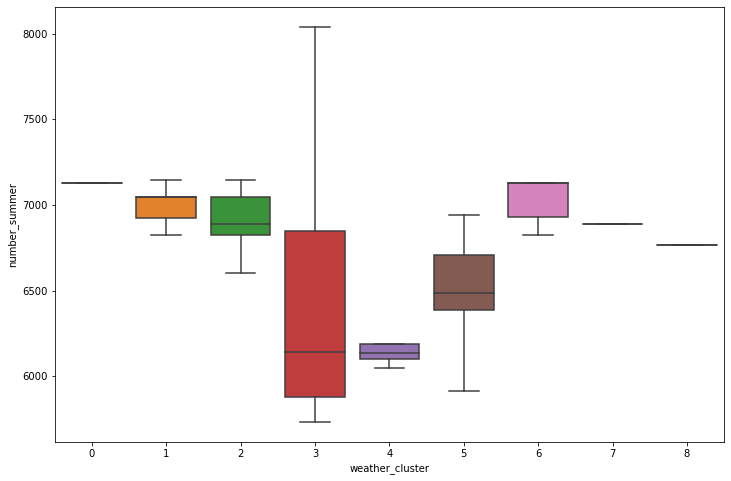

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="number_summer", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='number_autumn'>

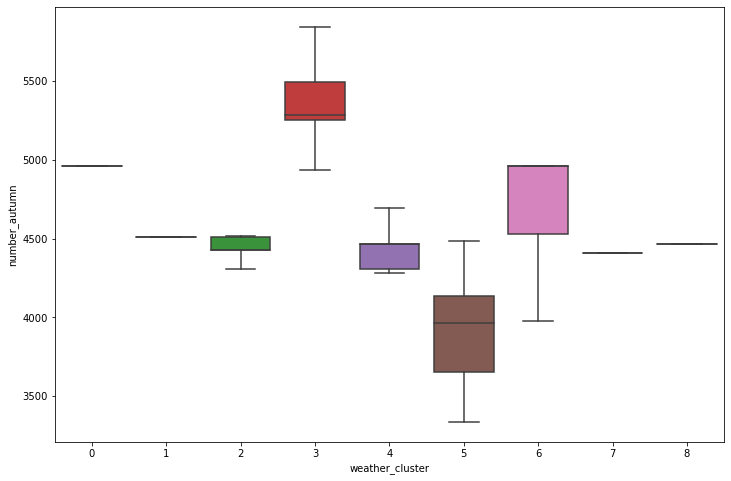

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="number_autumn", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='number_winter'>

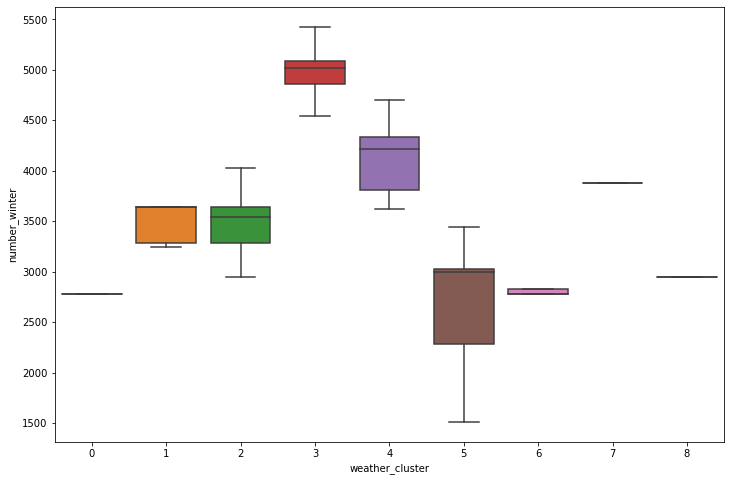

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="number_winter", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='number_spring'>

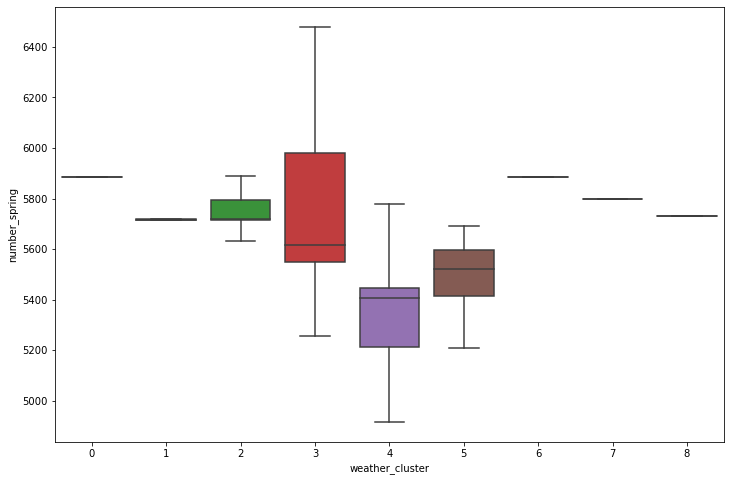

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="number_spring", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='site_eui'>

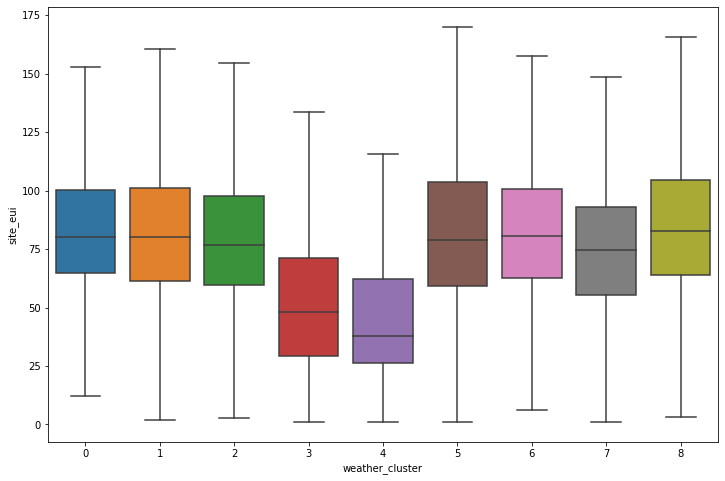

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="site_eui", data=df, showfliers = False)

<AxesSubplot:xlabel='weather_cluster', ylabel='calculated_eui'>

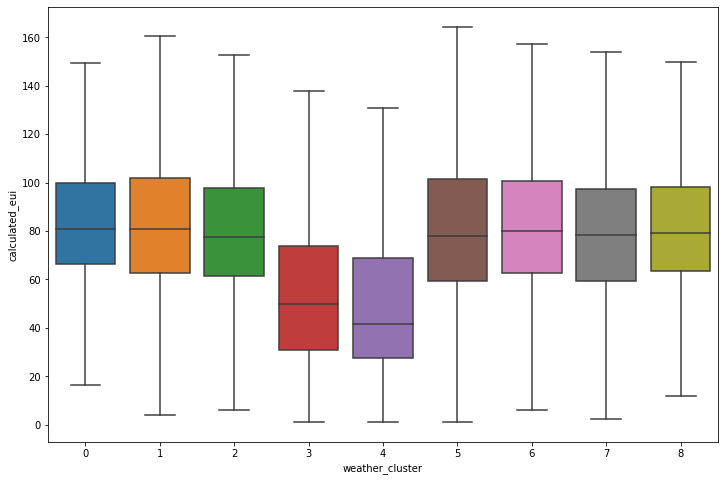

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="weather_cluster", y="calculated_eui", data=df, showfliers = False)

In [53]:
df.groupby(['state_factor','weather_cluster'])['january_min_temp'].min()

state_factor  weather_cluster
State_1       1                  17
              2                   3
              3                  18
              4                  14
              5                 -16
              6                  11
              7                  19
State_10      0                  12
              2                   6
              6                  10
              7                  15
State_11      1                  26
              2                  17
              4                  21
              5                  17
              6                  17
              7                  28
State_2       1                  11
              2                   3
              4                  15
              6                   8
              8                   3
State_4       5                 -19
              6                  -9
              8                  -6
State_6       0                   1
              1                   

In [54]:
df.tail()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,...,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id,number_january,number_february,number_march,number_april,number_may,number_june,number_july,number_august,number_september,number_october,number_november,number_december,total_number,number_winter,number_spring,number_summer,number_autumn,eui_improved,eui_diff,hdd_extreme,hdd_extreme_2,avg_total_number_building,year_built_bin,yearB_E_int,calculated_eui,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,weather_cluster
85457,7,State_11,Residential,5plus_Unit_Building,305925.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,...,0,0,0,0,0,0,0,0,other_res,2013,4,1,1,2,99.7,1197.6828,1166.69175,1441.14815,1525.7945,1804.23535,1881.86975,2077.8405,2163.94085,1948.8148,1649.07885,1398.42055,1257.181,19512.69885,3805.5227,5211.8996,6190.59615,4304.6804,-1,0.0,474.491129,802.491129,20003.5686,5,2,23.510543,0.012794,1,1,-0.148535,2,24.101985,36.737785,1,1,4
85458,7,State_11,Residential,5plus_Unit_Building,34909.0,26.5,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,...,0,0,0,0,0,0,0,0,other_res,1910,1,1,1,1,91.3,1197.6828,1166.69175,1441.14815,1525.7945,1804.23535,1881.86975,2077.8405,2163.94085,1948.8148,1649.07885,1398.42055,1257.181,19512.69885,3805.5227,5211.8996,6190.59615,4304.6804,-1,0.0,474.491129,802.491129,20003.5686,1,2,20.275804,0.012265,1,1,-0.167657,2,20.785871,36.737785,1,1,4
85459,7,State_11,Residential,5plus_Unit_Building,42393.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,...,0,0,0,0,0,0,0,0,other_res,2014,1,1,1,2,96.0,1197.6828,1166.69175,1441.14815,1525.7945,1804.23535,1881.86975,2077.8405,2163.94085,1948.8148,1649.07885,1398.42055,1257.181,19512.69885,3805.5227,5211.8996,6190.59615,4304.6804,-1,0.0,474.491129,802.491129,20003.5686,5,2,36.411445,0.012992,2,2,-0.080845,2,37.327426,36.737785,1,1,4
85460,7,State_11,Residential,5plus_Unit_Building,25368.0,812.0,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,...,0,0,0,0,0,0,0,0,other_res,1992,1,1,1,2,70.0,1197.6828,1166.69175,1441.14815,1525.7945,1804.23535,1881.86975,2077.8405,2163.94085,1948.8148,1649.07885,1398.42055,1257.181,19512.69885,3805.5227,5211.8996,6190.59615,4304.6804,-1,0.0,474.491129,802.491129,20003.5686,5,2,28.050669,0.015338,1,1,-0.120

In [55]:
df.to_csv('C:/Users/Meyke/WiDS/data/features_data_0402_imputed_star_rating_and_generous_building_id.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Columns: 112 entries, year_factor to weather_cluster
dtypes: float64(48), int64(60), object(4)
memory usage: 73.0+ MB


In [57]:
df.columns

Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'elevation', 'january_min_temp', 'january_avg_temp',
       'january_max_temp', 'february_min_temp',
       ...
       'calc_eui_perc_off', 'binned_calc_eui', 'binned_calc_eui_20',
       'verschil_uitstoot_per_temp_tov_jaar_state', 'StateYear_E_Int',
       'building_id_mean', 'fac_type_mean', 'energy_star_above_90',
       'energy_star_above_75', 'weather_cluster'],
      dtype='object', length=112)

In [58]:
df['year_built']

0        1942
1        1955
2        1951
3        1980
4        1985
         ... 
85457    2013
85458    1910
85459    2014
85460    1992
85461    1994
Name: year_built, Length: 85462, dtype: int64